## Projeto - Prevendo valores de veículos - VICTOR TINTEL

### Definindo o Problema de Negócio
<p> O meu objetivo é contsruir um modelo de Machile Learning que seja capaz de fazer previsões sobre o valor de venda de veículos, avaliando o melhor score apresentado.
<br> A variável a ser prevista é um valor numérico que representa o valor para venda ou compra de um veículo.
<br> Para resolver esse problema posso utilizar Regressão Linear.

<b>Fonte dos dados</b> - kaggle - https://www.kaggle.com/datasets/athirags/car-data

<b>Informações sobre as variáveis:</b>    
<br>Car_Name: Nome do carro
<br>Year: Ano que o carro foi vendido
<br>Present_Price: Preço atual decidido
<br>Mks_Driven: Total de Km rodados
<br>Fuel_Type: Tipo de Combustível (Diesel ou Petrol(Gasolina))
<br>Seller Type: Tipo de Venda
<br>Transmission: Tipo de Cambio (Manual ou Automático)
<br>Owner: Dono
<br>Selling_Price: O preço pelo qual o carro foi comprado (Essa será nossa variável TARGET)

In [ ]:
# Comando para instalar o pacote xgboost
!pip install xgboost

### Bibliotecas e Coleta de Dados

In [3]:
# Carregando os pacotes que serão utilizados

# Utilizado para analise e manipulação dos dados
import pandas as pd

# Utilizado para trabalharmos com datas
import datetime

# Utilizado para geração de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Tipo de algoritmo para criar o modelo preditivo
from xgboost import XGBRegressor

# Utilizado para separar os dados em treino e teste
from sklearn.model_selection import train_test_split

# Tipos de algoritmos para criar o modelo preditivo
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# Utilizado para avaliar as métricas dos modelos
from sklearn import metrics

# Utilizado para fazer a normalização dos dados
from sklearn.preprocessing import MinMaxScaler

# Utilizado para fazer a padronização dos dados
from sklearn.preprocessing import StandardScaler


import joblib

# Utilizado para não exibir infomrações de alertas, nesse caso não exibiremos apenas alertas de versões futuras
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Comando para exibir todas colunas e linhas do arquivo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# Coletando os dados a serem utilizados
df = pd.read_csv('cardata.csv')

### Analise Exploratória / Analise de Dados

In [7]:
# Visualizar o tamanho do conjunto de dados, ou seja, o tamanho do DataFrame
df.shape

(301, 9)

In [9]:
# Visualizando as primeiras linhas do arquivo
df.head(8)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0


In [11]:
# Visualizando as ultimas linhas do arquivo
# é bom sempre ver as últimas linhas do arquivo, porque as vezes, sendo principalmente um arquivo em excel, no final pode ter linhas se subtotal
# e com isso, vamos ter que tratar.
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [13]:
# Visualizando medidas estatísticas para variáveis numéricas
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [17]:
# Visualizando informações sobre os tipos das variáveis e conjunto de dados
# No nosso DESCRIBE já vimos que tem um total de 301 dados, entao no INFO conseguimos já visualizar se por acaso tem algum número nulo.
# Podemos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [19]:
# Verificando se há algum valor nulo
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [21]:
# Verificando Valores Únicos
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [23]:
# Fazer um agrupamento para verificar quantas observações temos para cada tipo da variável Fuel_Type
df.groupby(['Fuel_Type']).size()

Fuel_Type
CNG         2
Diesel     60
Petrol    239
dtype: int64

In [25]:
# Fazer um agrupamento para verificar quantas observações temos para cada tipo da variável Seller_Type
df.groupby(['Seller_Type']).size()

Seller_Type
Dealer        195
Individual    106
dtype: int64

In [27]:
# Fazer um agrupamento para verificar quantas observações temos para cada tipo da variável Transmission
df.groupby(['Transmission']).size()

Transmission
Automatic     40
Manual       261
dtype: int64

In [29]:
# Fazer um agrupamento para verificar quantas observações temos para cada tipo da variável Owner
df.groupby(['Owner']).size()

Owner
0    290
1     10
3      1
dtype: int64

In [31]:
# Fazer um agrupamento para verificar quantas observações temos para cada valor de venda
df.groupby(['Selling_Price']).size()

Selling_Price
0.10     1
0.12     1
0.15     1
0.16     1
0.17     1
0.18     1
0.20     6
0.25     5
0.27     1
0.30     3
0.31     1
0.35     4
0.38     2
0.40     5
0.42     2
0.45     8
0.48     4
0.50     5
0.51     1
0.52     1
0.55     2
0.60     8
0.65     4
0.72     1
0.75     4
0.78     1
0.80     1
0.90     2
0.95     1
1.00     1
1.05     5
1.10     3
1.11     1
1.15     4
1.20     3
1.25     2
1.35     3
1.45     1
1.50     1
1.65     1
1.70     1
1.75     1
1.95     2
2.00     1
2.10     1
2.25     3
2.35     1
2.50     2
2.55     2
2.65     3
2.70     1
2.75     2
2.85     3
2.90     3
2.95     2
3.00     4
3.10     4
3.15     1
3.25     3
3.35     2
3.45     1
3.49     1
3.50     2
3.51     1
3.60     1
3.65     1
3.75     2
3.80     1
3.90     2
3.95     2
4.00     5
4.10     2
4.15     1
4.35     1
4.40     3
4.50     7
4.60     1
4.65     1
4.75     6
4.80     2
4.85     1
4.90     2
4.95     2
5.00     1
5.11     1
5.15     1
5.20     1
5.25     7
5.30     2
5.35   

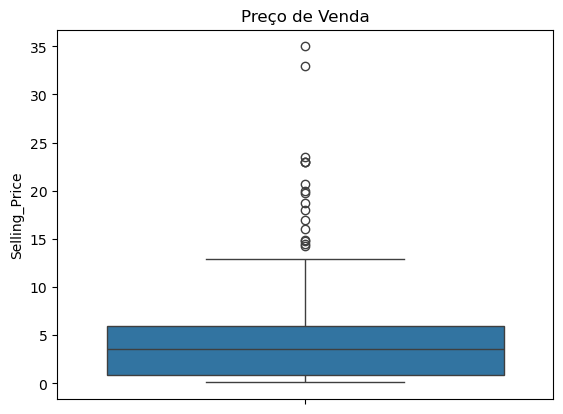

In [34]:
# Analiser possíveis Outliers com boxblot para a variavel Selling_Price
sns.boxplot(df['Selling_Price'])
plt.title('Preço de Venda')
plt.show()

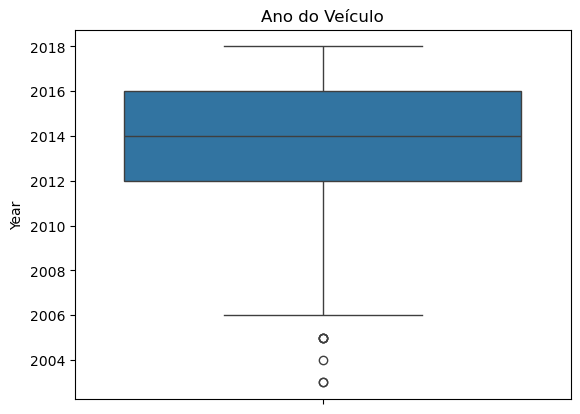

In [36]:
# Analiser possíveis Outliers para variável Ano 
# Nessa variável iremos fazer um tratamento mais adiante
sns.boxplot(df['Year'])
plt.title('Ano do Veículo')
plt.show()

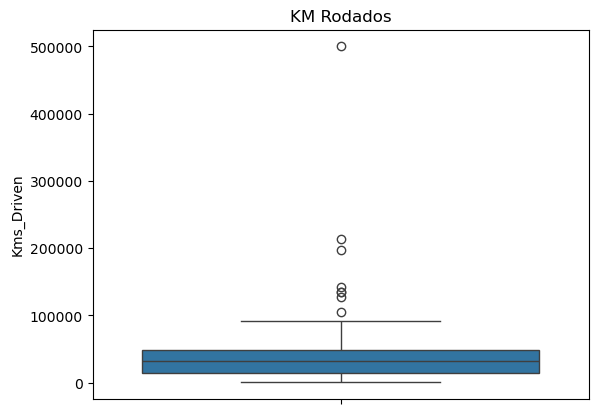

In [38]:
# Analiser possíveis Outliers para variavel KM Rodados
sns.boxplot(df['Kms_Driven'])
plt.title('KM Rodados')
plt.show()

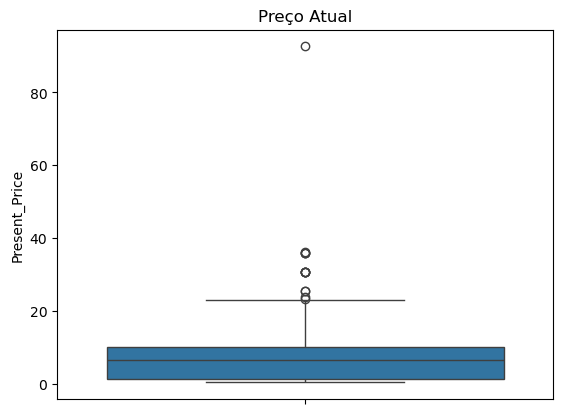

In [40]:
# Analiser possíveis Outliers para variavel Preço Atual
sns.boxplot(df['Present_Price'])
plt.title('Preço Atual')
plt.show()

### Pré Processamento dos Dados / Tratamento de Dados

In [42]:
# Obtendo a data atual
datetime = datetime.datetime.now()
print(datetime)

2025-07-30 14:42:12.639491


In [44]:
# Verificando o ano atual
datetime.year

2025

In [46]:
# Engenharia de atributo - obtendo a idade do carro
df['Age'] = datetime.year - df['Year']

In [48]:
# Ao verificar novamente nosso DataFrame podemos observar que temos uma nova coluna criada a partir de uma coluna atual
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [50]:
# Vamos excluir a variável ano
# AXIS = 1, representa a coluna
# AXIS = 0, representa a linha
df.drop('Year', axis = 1, inplace = True )
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


- INPLACE = TRUE significa que ele já vai salvar no próprio Dataframe.

In [53]:
# Como identificamos na analise do boxplot um possível outlier para variável Selling_Price
# Vamos aplicar um filtro para avaliar os dados e remover o outlier
# Então vou listar a variável SELLING_PRICE, com o comando SORTED para deixar na ordem 
# Comando REVERSE=TRUE, vai listar do maior para o menor.
sorted(df['Selling_Price'], reverse = True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [55]:
# Vamos avaliar quantas observações temos com valor maior ou igual a 33
df[(df['Selling_Price']>=33.0)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,8
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,15


In [57]:
# Podemos também filtrar dessa forma para analise
# Se utilizarmos o comando abaixo vamos verificar os dados que não contem valor maiores ou iguais a 33.0

df[~(df['Selling_Price']>=33.0)]

# Daria no mesmo também utilizar o comando dessa forma
#df[(df['Selling_Price']<33.0)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.590,27000,Petrol,Dealer,Manual,0,11
1,sx4,4.75,9.540,43000,Diesel,Dealer,Manual,0,12
2,ciaz,7.25,9.850,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2.85,4.150,5200,Petrol,Dealer,Manual,0,14
4,swift,4.60,6.870,42450,Diesel,Dealer,Manual,0,11
5,vitara brezza,9.25,9.830,2071,Diesel,Dealer,Manual,0,7
6,ciaz,6.75,8.120,18796,Petrol,Dealer,Manual,0,10
7,s cross,6.50,8.610,33429,Diesel,Dealer,Manual,0,10
8,ciaz,8.75,8.890,20273,Diesel,Dealer,Manual,0,9
9,ciaz,7.45,8.920,42367,Diesel,Dealer,Manual,0,10


In [59]:
# Removendo as 2 linhas criando um novo dataset com o filtro aplicado
# Aqui iremos criar um novo DataFrame com o mesmo nome (DF) porém aplicando já o filtro para considerar tudo que for
# inferior a 33
df = df[(df['Selling_Price']<33.0)]

In [61]:
# Visualizando o shape novamente, vamos observar que foram removidas 2 linhas
df.shape

(299, 9)

In [63]:
# Vou aplicar o Encoding dos dados, ou seja, transformar as variáveis strings em números

In [65]:
# Visualizando valores únicos
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [67]:
# Aplicando o Encoding utilizando a função map
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})

In [69]:
# Visualizando novamente os valores únicos
df['Fuel_Type'].unique()

array([0, 1, 2], dtype=int64)

In [71]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,Dealer,Manual,0,11
1,sx4,4.75,9.54,43000,1,Dealer,Manual,0,12
2,ciaz,7.25,9.85,6900,0,Dealer,Manual,0,8
3,wagon r,2.85,4.15,5200,0,Dealer,Manual,0,14
4,swift,4.60,6.87,42450,1,Dealer,Manual,0,11


In [73]:
# Visualizando valores únicos
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [75]:
# Aplicando o Encoding utilizando a função map
df['Seller_Type'] = df['Seller_Type'].map({'Dealer':0, 'Individual':1})

In [77]:
# Visualizando novamente os valores únicos
df['Seller_Type'].unique()

array([0, 1], dtype=int64)

In [79]:
# Visualizando valores únicos
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [81]:
# Aplicando o Encoding utilizando a função map
df['Transmission'] = df['Transmission'].map({'Manual':0, 'Automatic':1})

In [83]:
# Visualizando novamente os valores únicos
df['Transmission'].unique()

array([0, 1], dtype=int64)

In [85]:
# Visualizando nosso DataFrame
df.head(20)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,11
1,sx4,4.75,9.54,43000,1,0,0,0,12
2,ciaz,7.25,9.85,6900,0,0,0,0,8
3,wagon r,2.85,4.15,5200,0,0,0,0,14
4,swift,4.60,6.87,42450,1,0,0,0,11
5,vitara brezza,9.25,9.83,2071,1,0,0,0,7
6,ciaz,6.75,8.12,18796,0,0,0,0,10
7,s cross,6.50,8.61,33429,1,0,0,0,10
8,ciaz,8.75,8.89,20273,1,0,0,0,9
9,ciaz,7.45,8.92,42367,1,0,0,0,10


In [87]:
# Excluindo as variaveis que são do tipo object que não iremos utilizar
# Vou agora dividir o resto do meu dataframe, as variáveis preditoras da target. Portanto vou fazer DROP da variável target e também vou
# retirar a variável CAR_NAME porque nao faz sentido termos ela.
X = df.drop(['Car_Name','Selling_Price'], axis = 1 )  #Variáveis Preditoras
Y = df['Selling_Price'] # Variável Target

In [89]:
# Visualizando as variaveis preditoras
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,5.59,27000,0,0,0,0,11
1,9.54,43000,1,0,0,0,12
2,9.85,6900,0,0,0,0,8
3,4.15,5200,0,0,0,0,14
4,6.87,42450,1,0,0,0,11


In [91]:
# Visualizando a variavel target
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [93]:
# Quantidade de observações
print('Quantidade de observações de variáveis preditoras: ', X.shape[0])
print('Quantidade de observações da variável alvo: ', Y.shape[0])

Quantidade de observações de variáveis preditoras:  299
Quantidade de observações da variável alvo:  299


### Separação dos Dados em Treino e Teste

In [95]:
# Separar os dados em treino e teste
# Função: train_test_split do pacote Sklearn
# Parametro: test_size --> quantidade de dados que iremos separar para teste, consequentemente o restante fica para treino
# Parametro> random_state --> opcional, porém estou utilizando para reproduzir os mesmos resultados na sua máquina 

# Após a aplicação desse comando teremos os seguintes dados

# X_Treino: Variáveis preditoras para treino com 75% do conjunto de dados
# X_Teste: Variáveis preditoras para teste com 25% do conjunto de dados
# Y_Treino: Variável alvo com 75% do conjunto de dados
# Y_Teste: Variável alvo com 25% do conjunto de dados

X_Treino, X_Teste, Y_Treino, Y_Teste = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [97]:
print('Quantidade de observações de variáveis preditoras de treino: ', X_Treino.shape[0])
print('Quantidade de observações de variáveis preditoras de teste: ', X_Teste.shape[0])
print('Quantidade de observações de variável alvo de treino: ', Y_Treino.shape[0])
print('Quantidade de observações de variável alvo de teste: ', Y_Teste.shape[0])


Quantidade de observações de variáveis preditoras de treino:  224
Quantidade de observações de variáveis preditoras de teste:  75
Quantidade de observações de variável alvo de treino:  224
Quantidade de observações de variável alvo de teste:  75


### Escolhendo do algoritmo e Criação e Treino do Modelo
<p> Vamos utilizar 4 algoritmos para avaliarmos qual seria o melhor para este caso

In [99]:
# Criando o algoritmo
lr = LinearRegression()
# Treinando o algoritmo
lr.fit(X_Treino, Y_Treino)

# Criando o algoritmo
rf =RandomForestRegressor()
# Treinando o algoritmo
rf.fit(X_Treino, Y_Treino)

# Criando o algoritmo
xgb = GradientBoostingRegressor()
# Treinando o algoritmo
xgb.fit(X_Treino, Y_Treino)

# Criando o algoritmo
xg = XGBRegressor()
# Treinando o algoritmo
xg.fit(X_Treino, Y_Treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [102]:
#Fazendo as previsões
Previsoes_LR = lr.predict(X_Teste)
Previsoes_RF = rf.predict(X_Teste)
Previsoes_XGB = xgb.predict(X_Teste)
Previsoes_XG = xg.predict(X_Teste)

In [104]:
# Verificando as previsões
Previsoes_LR

array([ 8.28278028,  7.4327484 ,  1.34959496,  6.47486452, 12.47240402,
        4.42231142, 10.08337821,  1.78036592,  8.55652586, -1.2006253 ,
       11.70079826, -0.94663275, -0.14283369,  1.38549397,  9.83399181,
       10.91065926,  1.19275284,  1.990915  , 22.95723494,  0.76060948,
        0.86152762,  2.84299003,  5.67135223,  2.40639559,  2.40380555,
        8.84051307,  8.8347934 ,  1.18262436,  5.25541299,  5.13843666,
        7.85615747,  5.40967132,  6.74897474,  2.25202653,  8.35832457,
        6.44236986,  1.32559172, -8.76078087,  1.27903097, 11.71340266,
        8.05464548,  9.22587703,  1.68927992,  3.62952265,  0.93383064,
       -2.10894596,  9.11459453,  4.35185189,  4.68702363, -0.82262876,
        0.67575946,  0.20825226, 12.236819  ,  9.63226226,  8.24287125,
        5.50825999,  3.734612  ,  2.63625152,  9.91717564, 22.76908528,
        5.65875725, -0.34750726, -0.06260966, -0.89486744,  3.72114579,
        4.5256544 ,  8.66229626,  4.79182538,  2.53266326,  5.48

In [106]:
# Verificando as previsões
Previsoes_RF

array([ 9.8577,  8.2985,  0.4493,  6.821 , 14.4365,  5.2305,  7.0641,
        1.1745,  7.7746,  0.2997, 11.2765,  0.2119,  0.2466,  0.4672,
        5.1622,  7.3145,  0.6174,  1.19  , 21.735 ,  0.5566,  0.5625,
        2.6985,  6.2535,  3.023 ,  2.474 ,  9.1412,  8.9355,  1.1205,
        4.9369,  5.1931,  7.6975,  4.3875,  6.792 ,  2.934 ,  8.4252,
        6.2865,  1.162 ,  0.1627,  1.1545, 13.7355,  7.1464,  9.0196,
        0.906 ,  3.4721,  0.5557,  0.202 ,  9.9037,  4.9115,  3.9615,
        0.2249,  0.5528,  0.3301, 14.3145, 10.0204,  7.9601,  6.658 ,
        3.289 ,  2.8155, 10.333 , 20.66  ,  6.4435,  0.3385,  0.2934,
        0.4091,  3.3645,  2.8755,  9.5101,  4.474 ,  2.8805,  4.763 ,
        0.7743,  5.3954,  6.6655,  8.5355,  0.4611])

In [108]:
# Verificando as previsões
Previsoes_XGB

array([ 9.00822835,  8.64896927,  0.50152715,  7.16937971, 10.98497848,
        4.83291485,  6.20701675,  1.27612087,  8.46867441,  0.49490727,
        9.08544057,  0.19053052,  0.30782999,  0.54581373,  5.69040703,
        7.26670442,  0.62297215,  1.46391008, 21.72184177,  0.43961997,
        0.51638347,  2.92659693,  5.89260292,  3.17768661,  2.5590835 ,
        8.94870628,  9.90760257,  1.06739498,  4.76331456,  4.92245168,
        7.79295931,  4.47415449,  6.7675291 ,  2.71437944,  7.87726067,
        6.49319491,  1.13851162,  0.10485383,  1.06575504,  9.27028233,
        6.9195591 ,  9.3911703 ,  0.9071901 ,  3.541864  ,  0.54255136,
        0.19814791,  9.71379649,  4.45087642,  3.99362443,  0.20672794,
        0.53981684,  0.31449198,  9.17847731, 11.17887495,  8.23131467,
        6.95056688,  3.4743416 ,  2.71338904, 13.1030258 , 19.87174392,
        6.73544895,  0.37526821,  0.27287853,  0.40597456,  3.47083873,
        3.08253492,  9.40532132,  4.46405796,  2.74326829,  4.68

In [110]:
# Verificando as previsões
Previsoes_XG

array([ 9.872594  ,  8.736616  ,  0.43426073,  7.0851126 , 10.577909  ,
        5.249046  ,  6.4713507 ,  1.2846173 ,  7.9020653 ,  0.28867725,
        9.350536  ,  0.23063433,  0.273173  ,  0.4327215 ,  4.9183073 ,
        7.168832  ,  0.63252544,  1.6783333 , 18.810719  ,  0.3639122 ,
        0.54363036,  1.3766756 ,  5.7287903 ,  2.9317951 ,  2.33132   ,
        9.133402  ,  8.74428   ,  1.0877929 ,  4.7220373 ,  5.1416407 ,
        7.759017  ,  3.9250464 ,  6.5938673 ,  2.3199859 ,  6.5538015 ,
        5.947032  ,  1.1404628 ,  0.15616448,  0.7267851 ,  8.725867  ,
        5.674859  ,  9.387238  ,  0.9283276 ,  3.7244139 ,  0.5020527 ,
        0.16577499, 10.2771    ,  4.6775894 ,  3.884433  ,  0.26816753,
        0.5585904 ,  0.372262  , 10.477427  , 10.528948  ,  5.862964  ,
        6.7667365 ,  3.394586  ,  2.7200377 , 11.598327  , 18.745384  ,
        6.307808  ,  0.26374128,  0.24767748,  0.39932987,  3.059431  ,
        2.9096043 ,  9.729754  ,  4.514561  ,  2.818545  ,  4.49

### Avaliando a Performance dos Algoritmos

In [112]:
# Avaliando Performance dos algoritmos
score_LR = metrics.r2_score(Y_Teste, Previsoes_LR)
score_RF = metrics.r2_score(Y_Teste, Previsoes_RF)
score_XGB = metrics.r2_score(Y_Teste, Previsoes_XGB)
score_XG = metrics.r2_score(Y_Teste, Previsoes_XG)

In [114]:
print('Score utilizando Linear Regression: ', score_LR)
print('Score utilizando Linear Random Forest Regressor: ', score_RF)
print('Score utilizando GradientBoostingRegressor: ', score_XGB)
print('Score utilizando XGBRegressor: ', score_XG)

Score utilizando Linear Regression:  0.7106971141598675
Score utilizando Linear Random Forest Regressor:  0.7478338922902626
Score utilizando GradientBoostingRegressor:  0.8968776100781777
Score utilizando XGBRegressor:  0.8821570627049665


In [116]:
# Aqui vamos gerar um DataFrame com os resultados das avaliações dos algoritmos
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'], 'R2_Score' : [score_LR,score_RF,score_XGB,score_XG]})
final_data

,Models,R2_Score
0,LR,0.710697
1,RF,0.747834
2,GBR,0.896878
3,XG,0.882157


### Vamos aplicar a Padronização e Normalização para tentar melhor a performance do modelo

In [118]:
# Aplicando a normalização dos dados
sc = MinMaxScaler()
X_treino_normalizados = sc.fit_transform(X_Treino)
X_teste_normalizados = sc.transform(X_Teste)

In [120]:
X_treino_normalizados

array([[0.11531987, 0.26588235, 0.        , ..., 0.        , 0.        ,
        0.42857143],
       [0.84988777, 0.41647059, 0.5       , ..., 1.        , 0.        ,
        0.35714286],
       [0.56481481, 0.27529412, 0.5       , ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [0.03310887, 0.08235294, 0.        , ..., 0.        , 0.        ,
        0.07142857],
       [0.27160494, 0.12752941, 0.        , ..., 0.        , 0.        ,
        0.14285714],
       [0.03226712, 0.01694118, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [122]:
lr = LinearRegression()
lr.fit(X_treino_normalizados, Y_Treino)

rf =RandomForestRegressor()
rf.fit(X_treino_normalizados, Y_Treino)

xgb = GradientBoostingRegressor()
xgb.fit(X_treino_normalizados, Y_Treino)

xg = XGBRegressor()
xg.fit(X_treino_normalizados, Y_Treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [124]:
Previsoes_LR = lr.predict(X_teste_normalizados)
Previsoes_RF = rf.predict(X_teste_normalizados)
Previsoes_XGB = xgb.predict(X_teste_normalizados)
Previsoes_XG = xg.predict(X_teste_normalizados)

### Avaliando as métricas do modelo

In [126]:
score_LR = metrics.r2_score(Y_Teste, Previsoes_LR)
score_RF = metrics.r2_score(Y_Teste, Previsoes_RF)
score_XGB = metrics.r2_score(Y_Teste, Previsoes_XGB)
score_XG = metrics.r2_score(Y_Teste, Previsoes_XG)

In [128]:
print('Score utilizando Linear Regression: ', score_LR)
print('Score utilizando Linear Random Forest Regressor: ', score_RF)
print('Score utilizando GradientBoostingRegressor: ', score_XGB)
print('Score utilizando XGBRegressor: ', score_XG)

Score utilizando Linear Regression:  0.7106971141598697
Score utilizando Linear Random Forest Regressor:  0.7926075134851653
Score utilizando GradientBoostingRegressor:  0.9042601569164839
Score utilizando XGBRegressor:  0.8821570627049665


In [130]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'], 'R2_Score' : [score_LR,score_RF,score_XGB,score_XG]})
final_data

,Models,R2_Score
0,LR,0.710697
1,RF,0.792608
2,GBR,0.904260
3,XG,0.882157


In [132]:
# Aplicando a padronização dos dados
sc = StandardScaler()
X_treino_padronizados = sc.fit_transform(X_Treino)
X_teste_padronizados = sc.transform(X_Teste)

In [134]:
lr = LinearRegression()
lr.fit(X_treino_padronizados, Y_Treino)

rf =RandomForestRegressor()
rf.fit(X_treino_padronizados, Y_Treino)

xgb = GradientBoostingRegressor()
xgb.fit(X_treino_padronizados, Y_Treino)

xg = XGBRegressor()
xg.fit(X_treino_padronizados, Y_Treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Avaliando as novas métricas

In [137]:
Previsoes_LR = lr.predict(X_teste_padronizados)
Previsoes_RF = rf.predict(X_teste_padronizados)
Previsoes_XGB = xgb.predict(X_teste_padronizados)
Previsoes_XG = xg.predict(X_teste_padronizados)

In [139]:
score_LR = metrics.r2_score(Y_Teste, Previsoes_LR)
score_RF = metrics.r2_score(Y_Teste, Previsoes_RF)
score_XGB = metrics.r2_score(Y_Teste, Previsoes_XGB)
score_XG = metrics.r2_score(Y_Teste, Previsoes_XG)

In [141]:
print('Score utilizando Linear Regression: ', score_LR)
print('Score utilizando Linear Random Forest Regressor: ', score_RF)
print('Score utilizando GradientBoostingRegressor: ', score_XGB)
print('Score utilizando XGBRegressor: ', score_XG)

Score utilizando Linear Regression:  0.7106971141598699
Score utilizando Linear Random Forest Regressor:  0.7509765857531462
Score utilizando GradientBoostingRegressor:  0.9052700126734015
Score utilizando XGBRegressor:  0.8821570627049665


In [143]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'], 'R2_Score' : [score_LR,score_RF,score_XGB,score_XG]})
final_data

,Models,R2_Score
0,LR,0.710697
1,RF,0.750977
2,GBR,0.905270
3,XG,0.882157


### Salvando o Modelo Pronto para Implantação

In [145]:
# Salvando nosso modelo para implantação
joblib.dump(xgb, 'modelo_treinado_veiculos.pk')
print("Modelo Salvo com Sucesso")

Modelo Salvo com Sucesso
